# Analyzing Racial Demographics in the Inland Empire
##### UP 206A | Winter 2021 | By Angelica Ruiz

For this assignment, I'll be exploring the racial composition of Riverside County from a GeoJSON data downloaded from the Census Reporter. I subdivided the data prior to download so that it could include the census tracts within my counties of interest, since that's the level of focus I want for the project. This analysis will be able to provide me with important information regarding the race of the residents living in the Inland Empire.

## Loading the Libraries

Before I import the data, I must first load the libraries that I'll be using to conduct my initial data exploration.

In [20]:
#load libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## Importing the Data

Now that the libraries are loaded into jupyterhub, I'll import the GeoJSON data so that I can begin data exploration. Unfortunately, on Census Reporter I was unable to figure out how to subdivide both counties into census tract. For some reason, I was only able to subdivide the intial county I started with. As a result of this, I'll be focusing on only analyzing Riverside County for this assignment.

In [21]:
#import the Riverside census tracts
r_gdf = gpd.read_file('race_data/acs2019_R.geojson')

## Preliminary Inspection

Before diving into cleaning the data or exploring it further, I'll first take a look at what the file looks like and the various components of within it. First I'll look at the size of the data, then I'll take a peak into the first few lines. 

In [22]:
#tells us the number of rows and columns
r_gdf.shape

(454, 45)

In [23]:
#gives us a peak into the first few lines of the data
r_gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06065,"Riverside County, CA",2411439.0,0.0,1231961.0,0.0,851702.0,892.0,147160.0,1619.0,...,338.0,513186.0,11136.0,48333.0,2898.0,27833.0,2124.0,20500.0,1858.0,"MULTIPOLYGON (((-117.67244 33.87026, -117.6725..."
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,88.0,498.0,92.0,135.0,82.0,176.0,87.0,...,12.0,497.0,133.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,329.0,678.0,119.0,568.0,126.0,5.0,9.0,...,2.0,877.0,300.0,36.0,25.0,36.0,25.0,0.0,12.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,478.0,2582.0,346.0,1016.0,228.0,648.0,189.0,...,17.0,2142.0,619.0,212.0,191.0,88.0,115.0,124.0,151.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,405.0,2735.0,260.0,2297.0,210.0,156.0,101.0,...,12.0,568.0,320.0,64.0,53.0,29.0,37.0,35.0,36.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."


#### Next, I'm going to quickly map it so I can make sure the file has the correct data.

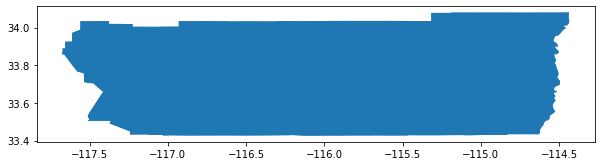

In [24]:
#plot the data
r_gdf.plot(figsize=(10,10))

Yup, looks like Riverside County!

## Delete County Row

When I took a peak into the first few rows of the data, I noticed that the first row is the county information. Since I'll be looking at specific census tracts within Riverside County, I'm going to delete it so it doesn't affect the data exploration and data analysis.

In [25]:
#drop the first row (called row 0)
r_gdf = r_gdf.drop([0])

In [26]:
#confirm it was dropped
r_gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,88.0,498.0,92.0,135.0,82.0,176.0,87.0,...,12.0,497.0,133.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,329.0,678.0,119.0,568.0,126.0,5.0,9.0,...,2.0,877.0,300.0,36.0,25.0,36.0,25.0,0.0,12.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,478.0,2582.0,346.0,1016.0,228.0,648.0,189.0,...,17.0,2142.0,619.0,212.0,191.0,88.0,115.0,124.0,151.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,405.0,2735.0,260.0,2297.0,210.0,156.0,101.0,...,12.0,568.0,320.0,64.0,53.0,29.0,37.0,35.0,36.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",4071.0,336.0,2036.0,253.0,1411.0,223.0,440.0,152.0,...,12.0,1023.0,292.0,166.0,124.0,58.0,66.0,108.0,107.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."


# Data Types

To make sure that the each column is in the correct format for the analysis that I want to do, I need to check the data type of all the variables.

In [27]:
#look at data types
r_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 453 entries, 1 to 453
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             453 non-null    object  
 1   name              453 non-null    object  
 2   B03002001         453 non-null    float64 
 3   B03002001, Error  453 non-null    float64 
 4   B03002002         453 non-null    float64 
 5   B03002002, Error  453 non-null    float64 
 6   B03002003         453 non-null    float64 
 7   B03002003, Error  453 non-null    float64 
 8   B03002004         453 non-null    float64 
 9   B03002004, Error  453 non-null    float64 
 10  B03002005         453 non-null    float64 
 11  B03002005, Error  453 non-null    float64 
 12  B03002006         453 non-null    float64 
 13  B03002006, Error  453 non-null    float64 
 14  B03002007         453 non-null    float64 
 15  B03002007, Error  453 non-null    float64 
 16  B03002008         

## Dropping Columns

The data contains many columns that I don't need for my analysis. I'm interested in the non-Hispanic or Latino breakdown and just the Hispanic or Latino categories. Therefore, I can delete the subcategories under Hispanic or Latino. In order to do this correctly, I look at the `metadata.json` file that I downloaded along with the other data. 

In [28]:
#list the column names
list(r_gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [29]:
#keep the columns that I want
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [30]:
#redefine the r_gdf to only include the `columns_to_keep`
r_gdf = r_gdf[columns_to_keep]

In [31]:
#confirm the unnecessary columns were deleted
r_gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,498.0,135.0,176.0,0.0,160.0,0.0,27.0,0.0,703.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,678.0,568.0,5.0,1.0,54.0,0.0,0.0,50.0,1599.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,2582.0,1016.0,648.0,9.0,728.0,0.0,12.0,169.0,5068.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,2735.0,2297.0,156.0,7.0,80.0,0.0,26.0,169.0,1734.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",4071.0,2036.0,1411.0,440.0,8.0,65.0,7.0,7.0,98.0,2035.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."


## Rename Columns

Right now the columns are just numbers that don't really mean anything to me. In order to make the analysis more meaningful and easier to read, I'm going to change the names of the columns. I'll be looking at the `metadata.json` file to see how they defined each column.

In [32]:
#rename columns
r_gdf.columns = ['geoid',
 'name',
 'Total',
 'Not Latino',
 'Non Latino White',
 'Non Latino Black',
 'Non Latino American Indian and Alaska Native',
 'Non Latino Asian',
 'Non Latino Native Hawaiian and Other Pacific Islander',
 'Non Latino Some other race',
 'Non Latino Two or more races',
 'Latino',
 'geometry']

In [33]:
r_gdf.head()

,geoid,name,Total,Not Latino,Non Latino White,Non Latino Black,Non Latino American Indian and Alaska Native,Non Latino Asian,Non Latino Native Hawaiian and Other Pacific Islander,Non Latino Some other race,Non Latino Two or more races,Latino,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,498.0,135.0,176.0,0.0,160.0,0.0,27.0,0.0,703.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,678.0,568.0,5.0,1.0,54.0,0.0,0.0,50.0,1599.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,2582.0,1016.0,648.0,9.0,728.0,0.0,12.0,169.0,5068.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,2735.0,2297.0,156.0,7.0,80.0,0.0,26.0,169.0,1734.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",4071.0,2036.0,1411.0,440.0,8.0,65.0,7.0,7.0,98.0,2035.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."


## Simple Statistics and Plots

Now I can begin to analyze the data and create some descriptive graphs. This will help me get a better idea of how the population is distributed across the census tracts within Riverside County.

In [17]:
#descriptive statistics
r_gdf['Total'].describe()

count      453.000000
mean      5323.264901
std       2657.524325
min          0.000000
25%       3411.000000
50%       4912.000000
75%       6632.000000
max      16512.000000
Name: Total, dtype: float64

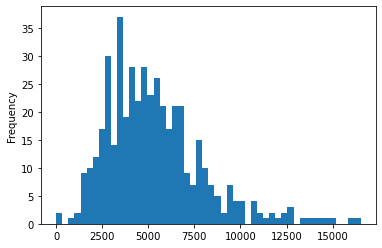

In [18]:
#histogram plot
r_gdf['Total'].plot.hist(bins=50)

## Normalizing the Data

To make sure that I'm able to compare each census tract to each other, I must first normalize the data. I'll be converting it to a percent of the total population in the census tract.

In [34]:
#get names of columns
list(r_gdf)

['geoid',
 'name',
 'Total',
 'Not Latino',
 'Non Latino White',
 'Non Latino Black',
 'Non Latino American Indian and Alaska Native',
 'Non Latino Asian',
 'Non Latino Native Hawaiian and Other Pacific Islander',
 'Non Latino Some other race',
 'Non Latino Two or more races',
 'Latino',
 'geometry']

In [35]:
#normalizing all the columns
r_gdf['Percent Not Latino'] = r_gdf['Not Latino']/r_gdf['Total']*100
r_gdf['Percent Latino'] = r_gdf['Latino']/r_gdf['Total']*100
r_gdf['Percent Non Latino White'] = r_gdf['Non Latino White']/r_gdf['Total']*100
r_gdf['Percent Non Latino Black'] = r_gdf['Non Latino Black']/r_gdf['Total']*100
r_gdf['Percent Non Latino American Indian and Alaska Native'] = r_gdf['Non Latino American Indian and Alaska Native']/r_gdf['Total']*100
r_gdf['Percent Non Latino Asian'] = r_gdf['Non Latino Asian']/r_gdf['Total']*100
r_gdf['Percent Non Latino Native Hawaiian and Other Pacific Islander'] = r_gdf['Non Latino Native Hawaiian and Other Pacific Islander']/r_gdf['Total']*100
r_gdf['Percent Non Latino Some other race'] = r_gdf['Non Latino Some other race']/r_gdf['Total']*100
r_gdf['Percent Non Latino Two or more races'] = r_gdf['Non Latino Two or more races']/r_gdf['Total']*100

In [36]:
r_gdf.head()

,geoid,name,Total,Not Latino,Non Latino White,Non Latino Black,Non Latino American Indian and Alaska Native,Non Latino Asian,Non Latino Native Hawaiian and Other Pacific Islander,Non Latino Some other race,...,geometry,Percent Not Latino,Percent Latino,Percent Non Latino White,Percent Non Latino Black,Percent Non Latino American Indian and Alaska Native,Percent Non Latino Asian,Percent Non Latino Native Hawaiian and Other Pacific Islander,Percent Non Latino Some other race,Percent Non Latino Two or more races
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,498.0,135.0,176.0,0.0,160.0,0.0,27.0,...,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574...",41.465445,58.534555,11.240633,14.654455,0.000000,13.322231,0.000000,2.248127,0.000000
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,678.0,568.0,5.0,1.0,54.0,0.0,0.0,...,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748...",29.776021,70.223979,24.945103,0.219587,0.043917,2.371542,0.000000,0.000000,2.195872
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,2582.0,1016.0,648.0,9.0,728.0,0.0,12.0,...,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778...",33.751634,66.248366,13.281046,8.470588,0.117647,9.516340,0.000000,0.156863,2.209150
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,2735.0,2297.0,156.0,7.0,80.0,0.0,26.0,...,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274...",61.199373,38.800627,51.398523,3.490714,0.156635,1.790110,0.000000,0.581786,3.781607
5,14000US06065030300,"Census Tract 303, Riverside, CA",4071.0,2036.0,1411.0,440.0,8.0,65.0,7.0,7.0,...,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891...",50.012282,49.987718,34.659789,10.808155,0.196512,1.596659,0.171948,0.171948,2.407271


# Create Maps

Now that I've cleaned up the data and filtered the columns that I want, I can start mapping the racial demographic of the census tracts in Riverside County.

## Percent Latino by Census Tract

First, I want to look at just the percent Latino within each census tract.

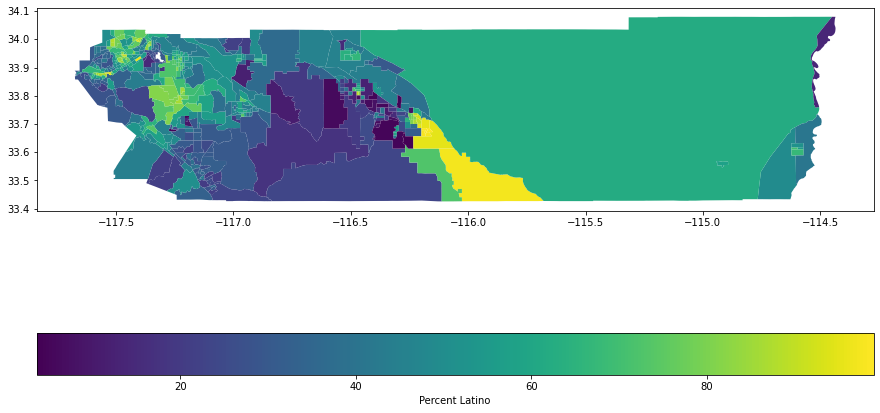

In [64]:
#import another library to help me plot 
from mpl_toolkits.axes_grid1 import make_axes_locatable as mpl

fig, ax = plt.subplots(figsize = (15, 15))

r_gdf.plot(column = 'Percent Latino',
           ax = ax,
           legend = True,
           legend_kwds = {'label': "Percent Latino",'orientation': 'horizontal'})

## Compare Census Tracts by Race

Now that I have an idea of where the highest percent of Latinos live within Riverside county, I'm going to compare where percent Non-Latino White and Non-Latino Black live and compare side-by-side to the previous map I just created.

Text(0.5, 1.0, 'Percent Non Latino Black')

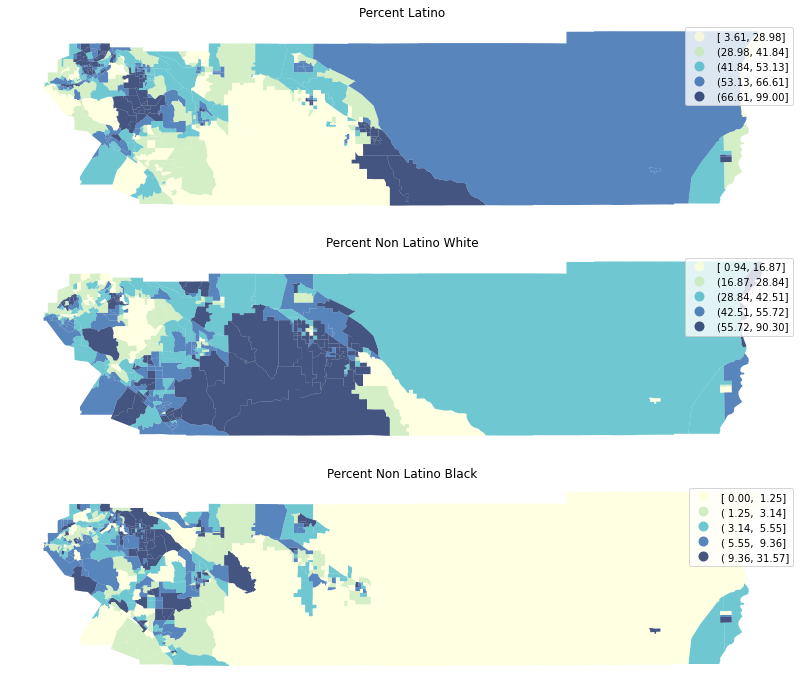

In [73]:
#first create the 1x2 subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 12))

#next, give each subplot a name
ax1, ax2, ax3 = axs

#percent Latino map (left)
r_gdf.plot(column='Percent Latino', 
            cmap='YlGnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True,
           )

ax1.axis("off")
ax1.set_title("Percent Latino")

#percent Non Latino White (middle)
r_gdf.plot(column='Percent Non Latino White', 
            cmap='YlGnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True,
           )

ax2.axis("off")
ax2.set_title("Percent Non Latino White")

#percent Non Latino Black (right)
r_gdf.plot(column='Percent Non Latino Black', 
           cmap='YlGnBu', 
           scheme='quantiles',
           k=5, 
           edgecolor='white', 
           linewidth=0., 
           alpha=0.75, 
           ax=ax3,
           legend=True,
           )

ax3.axis("off")
ax3.set_title("Percent Non Latino Black")

# Conclusion

As shown by my preliminary analysis and mapping, there seems to be disparities with regards to where Latinos, Non Latino Black, and Non Latino White folks live within Riverside County. The areas which are mostly populated by Non Latino White individuals is almost the complete opposite of where Latino and Non Latino Black individuals reside. I'm curious to dive deeper into the data and see how this relates to the location of warehouses and pollution. 